In [1]:
# lets display some cmap colors from matplotlib & colorlover
from matplotlib import cm
import colorlover as cl 
from plotly.offline import iplot, plot, init_notebook_mode
import plotly.graph_objects as go
init_notebook_mode(connected=True)
from IPython.display import HTML

from vis.code.color.colorlover_utils import hex_string_to_rgb, rgb_to_hex_string, rgb_to_html_display
print('hello')

hello


In [2]:
"""
first things first, we want to be able to handle hex to rgb and rgb to hex. One of the benefits of using Jupyter notebooks is we can display the html colors
with the colorlover package and ipython's HTML import. 
https://github.com/jbs-public-function/vis/blob/master/vis/code/color/colorlover_utils.py
These tools should be sufficient going forward to handle the color values themselves
"""

HTML(''.join([rgb_to_html_display(color_name, hex_string_to_rgb(color)) for color_name, color in cm.colors.cnames.items()]))

In [3]:
display(HTML(''.join([rgb_to_html_display('10 colors RdBu: {}'.format(color), color) for color in cl.scales['10']['div']['RdBu']])))

`''.join([rgb_to_html_display('10 colors RdBu: {}'.format(color), color) for color in cl.scales['10']['div']['RdBu']])`
<HTML>
<div title="10 colors RdBu: rgb(103,0,31)" style="background-color:rgb(103,0,31);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(178,24,43)" style="background-color:rgb(178,24,43);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(214,96,77)" style="background-color:rgb(214,96,77);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(244,165,130)" style="background-color:rgb(244,165,130);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(253,219,199)" style="background-color:rgb(253,219,199);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(209,229,240)" style="background-color:rgb(209,229,240);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(146,197,222)" style="background-color:rgb(146,197,222);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(67,147,195)" style="background-color:rgb(67,147,195);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(33,102,172)" style="background-color:rgb(33,102,172);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(5,48,97)" style="background-color:rgb(5,48,97);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div></html>





<html>
<div title="aliceblue" style="background-color:rgb(240, 248, 255);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="antiquewhite" style="background-color:rgb(250, 235, 215);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="aqua" style="background-color:rgb(0, 255, 255);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="aquamarine" style="background-color:rgb(127, 255, 212);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="azure" style="background-color:rgb(240, 255, 255);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="beige" style="background-color:rgb(245, 245, 220);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="bisque" style="background-color:rgb(255, 228, 196);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="black" style="background-color:rgb(0, 0, 0);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="blanchedalmond" style="background-color:rgb(255, 235, 205);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="blue" style="background-color:rgb(0, 0, 255);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="blueviolet" style="background-color:rgb(138, 43, 226);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="brown" style="background-color:rgb(165, 42, 42);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="burlywood" style="background-color:rgb(222, 184, 135);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="cadetblue" style="background-color:rgb(95, 158, 160);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="chartreuse" style="background-color:rgb(127, 255, 0);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="chocolate" style="background-color:rgb(210, 105, 30);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="coral" style="background-color:rgb(255, 127, 80);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="cornflowerblue" style="background-color:rgb(100, 149, 237);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="cornsilk" style="background-color:rgb(255, 248, 220);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="crimson" style="background-color:rgb(220, 20, 60);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="cyan" style="background-color:rgb(0, 255, 255);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="darkblue" style="background-color:rgb(0, 0, 139);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="darkcyan" style="background-color:rgb(0, 139, 139);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="darkgoldenrod" style="background-color:rgb(184, 134, 11);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="darkgray" style="background-color:rgb(169, 169, 169);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="darkgreen" style="background-color:rgb(0, 100, 0);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="darkgrey" style="background-color:rgb(169, 169, 169);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="darkkhaki" style="background-color:rgb(189, 183, 107);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="darkmagenta" style="background-color:rgb(139, 0, 139);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="darkolivegreen" style="background-color:rgb(85, 107, 47);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="darkorange" style="background-color:rgb(255, 140, 0);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="darkorchid" style="background-color:rgb(153, 50, 204);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="darkred" style="background-color:rgb(139, 0, 0);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="darksalmon" style="background-color:rgb(233, 150, 122);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="darkseagreen" style="background-color:rgb(143, 188, 143);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="darkslateblue" style="background-color:rgb(72, 61, 139);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="darkslategray" style="background-color:rgb(47, 79, 79);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="darkslategrey" style="background-color:rgb(47, 79, 79);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="darkturquoise" style="background-color:rgb(0, 206, 209);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="darkviolet" style="background-color:rgb(148, 0, 211);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="deeppink" style="background-color:rgb(255, 20, 147);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="deepskyblue" style="background-color:rgb(0, 191, 255);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="dimgray" style="background-color:rgb(105, 105, 105);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="dimgrey" style="background-color:rgb(105, 105, 105);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="dodgerblue" style="background-color:rgb(30, 144, 255);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="firebrick" style="background-color:rgb(178, 34, 34);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="floralwhite" style="background-color:rgb(255, 250, 240);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="forestgreen" style="background-color:rgb(34, 139, 34);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="fuchsia" style="background-color:rgb(255, 0, 255);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="gainsboro" style="background-color:rgb(220, 220, 220);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="ghostwhite" style="background-color:rgb(248, 248, 255);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="gold" style="background-color:rgb(255, 215, 0);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="goldenrod" style="background-color:rgb(218, 165, 32);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="gray" style="background-color:rgb(128, 128, 128);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="green" style="background-color:rgb(0, 128, 0);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="greenyellow" style="background-color:rgb(173, 255, 47);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="grey" style="background-color:rgb(128, 128, 128);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="honeydew" style="background-color:rgb(240, 255, 240);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="hotpink" style="background-color:rgb(255, 105, 180);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="indianred" style="background-color:rgb(205, 92, 92);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="indigo" style="background-color:rgb(75, 0, 130);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="ivory" style="background-color:rgb(255, 255, 240);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="khaki" style="background-color:rgb(240, 230, 140);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lavender" style="background-color:rgb(230, 230, 250);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lavenderblush" style="background-color:rgb(255, 240, 245);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lawngreen" style="background-color:rgb(124, 252, 0);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lemonchiffon" style="background-color:rgb(255, 250, 205);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightblue" style="background-color:rgb(173, 216, 230);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightcoral" style="background-color:rgb(240, 128, 128);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightcyan" style="background-color:rgb(224, 255, 255);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightgoldenrodyellow" style="background-color:rgb(250, 250, 210);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightgray" style="background-color:rgb(211, 211, 211);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightgreen" style="background-color:rgb(144, 238, 144);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightgrey" style="background-color:rgb(211, 211, 211);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightpink" style="background-color:rgb(255, 182, 193);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightsalmon" style="background-color:rgb(255, 160, 122);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightseagreen" style="background-color:rgb(32, 178, 170);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightskyblue" style="background-color:rgb(135, 206, 250);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightslategray" style="background-color:rgb(119, 136, 153);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightslategrey" style="background-color:rgb(119, 136, 153);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightsteelblue" style="background-color:rgb(176, 196, 222);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightyellow" style="background-color:rgb(255, 255, 224);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lime" style="background-color:rgb(0, 255, 0);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="limegreen" style="background-color:rgb(50, 205, 50);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="linen" style="background-color:rgb(250, 240, 230);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="magenta" style="background-color:rgb(255, 0, 255);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="maroon" style="background-color:rgb(128, 0, 0);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="mediumaquamarine" style="background-color:rgb(102, 205, 170);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="mediumblue" style="background-color:rgb(0, 0, 205);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="mediumorchid" style="background-color:rgb(186, 85, 211);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="mediumpurple" style="background-color:rgb(147, 112, 219);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="mediumseagreen" style="background-color:rgb(60, 179, 113);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="mediumslateblue" style="background-color:rgb(123, 104, 238);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="mediumspringgreen" style="background-color:rgb(0, 250, 154);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="mediumturquoise" style="background-color:rgb(72, 209, 204);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="mediumvioletred" style="background-color:rgb(199, 21, 133);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="midnightblue" style="background-color:rgb(25, 25, 112);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="mintcream" style="background-color:rgb(245, 255, 250);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="mistyrose" style="background-color:rgb(255, 228, 225);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="moccasin" style="background-color:rgb(255, 228, 181);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="navajowhite" style="background-color:rgb(255, 222, 173);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="navy" style="background-color:rgb(0, 0, 128);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="oldlace" style="background-color:rgb(253, 245, 230);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="olive" style="background-color:rgb(128, 128, 0);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="olivedrab" style="background-color:rgb(107, 142, 35);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="orange" style="background-color:rgb(255, 165, 0);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="orangered" style="background-color:rgb(255, 69, 0);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="orchid" style="background-color:rgb(218, 112, 214);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="palegoldenrod" style="background-color:rgb(238, 232, 170);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="palegreen" style="background-color:rgb(152, 251, 152);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="paleturquoise" style="background-color:rgb(175, 238, 238);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="palevioletred" style="background-color:rgb(219, 112, 147);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="papayawhip" style="background-color:rgb(255, 239, 213);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="peachpuff" style="background-color:rgb(255, 218, 185);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="peru" style="background-color:rgb(205, 133, 63);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="pink" style="background-color:rgb(255, 192, 203);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="plum" style="background-color:rgb(221, 160, 221);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="powderblue" style="background-color:rgb(176, 224, 230);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="purple" style="background-color:rgb(128, 0, 128);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="rebeccapurple" style="background-color:rgb(102, 51, 153);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="red" style="background-color:rgb(255, 0, 0);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="rosybrown" style="background-color:rgb(188, 143, 143);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="royalblue" style="background-color:rgb(65, 105, 225);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="saddlebrown" style="background-color:rgb(139, 69, 19);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="salmon" style="background-color:rgb(250, 128, 114);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="sandybrown" style="background-color:rgb(244, 164, 96);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="seagreen" style="background-color:rgb(46, 139, 87);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="seashell" style="background-color:rgb(255, 245, 238);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="sienna" style="background-color:rgb(160, 82, 45);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="silver" style="background-color:rgb(192, 192, 192);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="skyblue" style="background-color:rgb(135, 206, 235);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="slateblue" style="background-color:rgb(106, 90, 205);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="slategray" style="background-color:rgb(112, 128, 144);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="slategrey" style="background-color:rgb(112, 128, 144);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="snow" style="background-color:rgb(255, 250, 250);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="springgreen" style="background-color:rgb(0, 255, 127);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="steelblue" style="background-color:rgb(70, 130, 180);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="tan" style="background-color:rgb(210, 180, 140);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="teal" style="background-color:rgb(0, 128, 128);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="thistle" style="background-color:rgb(216, 191, 216);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="tomato" style="background-color:rgb(255, 99, 71);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="turquoise" style="background-color:rgb(64, 224, 208);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="violet" style="background-color:rgb(238, 130, 238);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="wheat" style="background-color:rgb(245, 222, 179);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="white" style="background-color:rgb(255, 255, 255);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="whitesmoke" style="background-color:rgb(245, 245, 245);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="yellow" style="background-color:rgb(255, 255, 0);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="yellowgreen" style="background-color:rgb(154, 205, 50);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>


<div title="dimgrey" style="background-color:rgb(105, 105, 105);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="dodgerblue" style="background-color:rgb(30, 144, 255);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="firebrick" style="background-color:rgb(178, 34, 34);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="floralwhite" style="background-color:rgb(255, 250, 240);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="forestgreen" style="background-color:rgb(34, 139, 34);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="fuchsia" style="background-color:rgb(255, 0, 255);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="gainsboro" style="background-color:rgb(220, 220, 220);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="ghostwhite" style="background-color:rgb(248, 248, 255);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="gold" style="background-color:rgb(255, 215, 0);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="goldenrod" style="background-color:rgb(218, 165, 32);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="gray" style="background-color:rgb(128, 128, 128);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="green" style="background-color:rgb(0, 128, 0);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="greenyellow" style="background-color:rgb(173, 255, 47);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="grey" style="background-color:rgb(128, 128, 128);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="honeydew" style="background-color:rgb(240, 255, 240);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="hotpink" style="background-color:rgb(255, 105, 180);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="indianred" style="background-color:rgb(205, 92, 92);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="indigo" style="background-color:rgb(75, 0, 130);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="ivory" style="background-color:rgb(255, 255, 240);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="khaki" style="background-color:rgb(240, 230, 140);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lavender" style="background-color:rgb(230, 230, 250);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lavenderblush" style="background-color:rgb(255, 240, 245);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lawngreen" style="background-color:rgb(124, 252, 0);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lemonchiffon" style="background-color:rgb(255, 250, 205);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightblue" style="background-color:rgb(173, 216, 230);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightcoral" style="background-color:rgb(240, 128, 128);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightcyan" style="background-color:rgb(224, 255, 255);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightgoldenrodyellow" style="background-color:rgb(250, 250, 210);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightgray" style="background-color:rgb(211, 211, 211);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightgreen" style="background-color:rgb(144, 238, 144);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightgrey" style="background-color:rgb(211, 211, 211);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightpink" style="background-color:rgb(255, 182, 193);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightsalmon" style="background-color:rgb(255, 160, 122);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightseagreen" style="background-color:rgb(32, 178, 170);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightskyblue" style="background-color:rgb(135, 206, 250);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightslategray" style="background-color:rgb(119, 136, 153);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightslategrey" style="background-color:rgb(119, 136, 153);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightsteelblue" style="background-color:rgb(176, 196, 222);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lightyellow" style="background-color:rgb(255, 255, 224);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="lime" style="background-color:rgb(0, 255, 0);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="limegreen" style="background-color:rgb(50, 205, 50);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="linen" style="background-color:rgb(250, 240, 230);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="magenta" style="background-color:rgb(255, 0, 255);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="maroon" style="background-color:rgb(128, 0, 0);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="mediumaquamarine" style="background-color:rgb(102, 205, 170);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="mediumblue" style="background-color:rgb(0, 0, 205);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="mediumorchid" style="background-color:rgb(186, 85, 211);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="mediumpurple" style="background-color:rgb(147, 112, 219);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="mediumseagreen" style="background-color:rgb(60, 179, 113);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="mediumslateblue" style="background-color:rgb(123, 104, 238);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="mediumspringgreen" style="background-color:rgb(0, 250, 154);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="mediumturquoise" style="background-color:rgb(72, 209, 204);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="mediumvioletred" style="background-color:rgb(199, 21, 133);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="midnightblue" style="background-color:rgb(25, 25, 112);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="mintcream" style="background-color:rgb(245, 255, 250);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="mistyrose" style="background-color:rgb(255, 228, 225);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="moccasin" style="background-color:rgb(255, 228, 181);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="navajowhite" style="background-color:rgb(255, 222, 173);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="navy" style="background-color:rgb(0, 0, 128);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="oldlace" style="background-color:rgb(253, 245, 230);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="olive" style="background-color:rgb(128, 128, 0);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="olivedrab" style="background-color:rgb(107, 142, 35);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="orange" style="background-color:rgb(255, 165, 0);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="orangered" style="background-color:rgb(255, 69, 0);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="orchid" style="background-color:rgb(218, 112, 214);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="palegoldenrod" style="background-color:rgb(238, 232, 170);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="palegreen" style="background-color:rgb(152, 251, 152);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="paleturquoise" style="background-color:rgb(175, 238, 238);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="palevioletred" style="background-color:rgb(219, 112, 147);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="papayawhip" style="background-color:rgb(255, 239, 213);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="peachpuff" style="background-color:rgb(255, 218, 185);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="peru" style="background-color:rgb(205, 133, 63);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="pink" style="background-color:rgb(255, 192, 203);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="plum" style="background-color:rgb(221, 160, 221);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="powderblue" style="background-color:rgb(176, 224, 230);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="purple" style="background-color:rgb(128, 0, 128);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="rebeccapurple" style="background-color:rgb(102, 51, 153);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="red" style="background-color:rgb(255, 0, 0);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="rosybrown" style="background-color:rgb(188, 143, 143);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="royalblue" style="background-color:rgb(65, 105, 225);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="saddlebrown" style="background-color:rgb(139, 69, 19);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="salmon" style="background-color:rgb(250, 128, 114);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="sandybrown" style="background-color:rgb(244, 164, 96);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="seagreen" style="background-color:rgb(46, 139, 87);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="seashell" style="background-color:rgb(255, 245, 238);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="sienna" style="background-color:rgb(160, 82, 45);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="silver" style="background-color:rgb(192, 192, 192);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="skyblue" style="background-color:rgb(135, 206, 235);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="slateblue" style="background-color:rgb(106, 90, 205);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="slategray" style="background-color:rgb(112, 128, 144);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="slategrey" style="background-color:rgb(112, 128, 144);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="snow" style="background-color:rgb(255, 250, 250);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="springgreen" style="background-color:rgb(0, 255, 127);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="steelblue" style="background-color:rgb(70, 130, 180);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="tan" style="background-color:rgb(210, 180, 140);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="teal" style="background-color:rgb(0, 128, 128);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="thistle" style="background-color:rgb(216, 191, 216);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="tomato" style="background-color:rgb(255, 99, 71);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="turquoise" style="background-color:rgb(64, 224, 208);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="violet" style="background-color:rgb(238, 130, 238);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="wheat" style="background-color:rgb(245, 222, 179);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="white" style="background-color:rgb(255, 255, 255);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="whitesmoke" style="background-color:rgb(245, 245, 245);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="yellow" style="background-color:rgb(255, 255, 0);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>
<div title="yellowgreen" style="background-color:rgb(154, 205, 50);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div>


#### TESTING THIS too


In [4]:
from IPython.display import Markdown as md
import plotly.io as pio
pio.renderers.default = "svg"


In [5]:
test  = ''.join([rgb_to_html_display('10 colors RdBu: {}'.format(color), color) for color in cl.scales['10']['div']['RdBu']])
test = '<html><body>{}</body></html>'.format(test)

In [6]:
md(test)

<html><body><div title="10 colors RdBu: rgb(103,0,31)" style="background-color:rgb(103,0,31);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(178,24,43)" style="background-color:rgb(178,24,43);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(214,96,77)" style="background-color:rgb(214,96,77);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(244,165,130)" style="background-color:rgb(244,165,130);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(253,219,199)" style="background-color:rgb(253,219,199);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(209,229,240)" style="background-color:rgb(209,229,240);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(146,197,222)" style="background-color:rgb(146,197,222);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(67,147,195)" style="background-color:rgb(67,147,195);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(33,102,172)" style="background-color:rgb(33,102,172);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(5,48,97)" style="background-color:rgb(5,48,97);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div></body></html>

In [7]:
md(test)

<html><body><div title="10 colors RdBu: rgb(103,0,31)" style="background-color:rgb(103,0,31);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(178,24,43)" style="background-color:rgb(178,24,43);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(214,96,77)" style="background-color:rgb(214,96,77);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(244,165,130)" style="background-color:rgb(244,165,130);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(253,219,199)" style="background-color:rgb(253,219,199);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(209,229,240)" style="background-color:rgb(209,229,240);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(146,197,222)" style="background-color:rgb(146,197,222);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(67,147,195)" style="background-color:rgb(67,147,195);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(33,102,172)" style="background-color:rgb(33,102,172);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div><div title="10 colors RdBu: rgb(5,48,97)" style="background-color:rgb(5,48,97);height:20px;width:20px;margin-bottom:0px;display:inline-block;"></div></body></html>

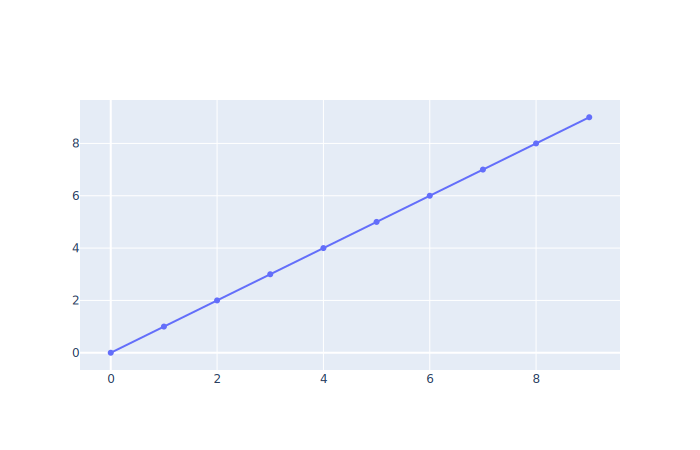

In [8]:
iplot([go.Scatter(x=list(range(0,10)), y=list(range(0,10)))])